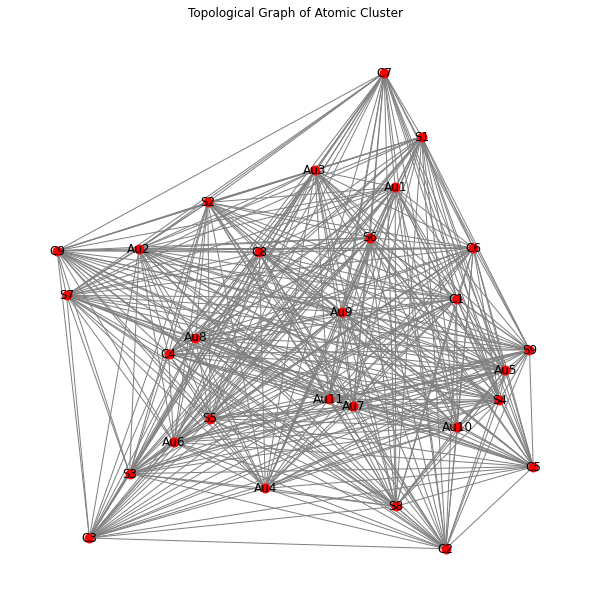

NameError: name 'squareform' is not defined

In [14]:
# First, let's parse the provided atomic coordinates
from io import StringIO
import pandas as pd
import networkx as nx

# Data string (cut-off data is ignored)
data_str = """
Au1 4.248121125 1.655160183 2.959082293
Au2 0.134411940 0.040429192 0.069599684
Au3 2.958433330 2.099904467 -0.262323016
Au4 2.162421959 -6.240474399 0.763068859
Au5 6.015567568 -3.147666840 2.960991448
Au6 0.691716123 -5.028950770 3.664334793
Au7 3.573756740 -4.082999919 5.427415311
S1 4.672967631 2.979829211 1.071811571
S2 1.238035230 1.254676533 -1.609047271
S3 -0.016754803 -5.854766215 1.567879875
S4 5.920038535 -3.922514716 5.192034478
S5 1.278335928 -4.410966592 5.861077045
S6 3.842066351 0.336276163 4.847347780
S7 -1.028475296 -1.181458615 1.702556392
S8 4.256728793 -6.712714766 -0.197857863
S9 6.402846543 -2.608854051 0.681607378
Au8 1.039542537 -2.286419424 2.137933733
Au9 3.388517386 -1.613304235 3.562141976
Au10 5.243831114 -4.625138509 0.259061332
Au11 3.177204579 -3.903948421 2.180548232
C1 5.234269498 -1.267910297 0.225552152
C2 5.059525709 -7.825128523 1.026367578
C3 -0.661617418 -7.542191162 1.914391467
C4 0.609696988 -2.711033182 6.045598591
C5 6.463239907 -5.671940745 5.052757858
C6 5.502812348 0.063557209 5.588215010
C7 4.071090685 4.655598421 1.533997591
C8 2.065105915 -0.051487758 -2.607114734
C9 -1.178984963 -0.008471112 3.111715524
"""

# Convert data string to DataFrame
data = StringIO(data_str)
df = pd.read_csv(data, sep=" ", names=["Atom", "x", "y", "z"])

# Initialize the graph
G = nx.Graph()

# Add nodes with position as a node attribute
for index, row in df.iterrows():
    G.add_node(row['Atom'], pos=(row['x'], row['y']))

# Now add edges between all nodes (assuming a fully connected network for demonstration)
# In practice, you would add edges based on some criteria, such as distance threshold or bonding information
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 != node2:
            G.add_edge(node1, node2)

# Extract positions from node attributes for plotting
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=80, edge_color='gray', node_color='red', with_labels=True)
plt.title('Topological Graph of Atomic Cluster')
plt.show()

# Re-calculate the pairwise Euclidean distances to ensure the 'distance_matrix' variable is defined
distance_matrix = squareform(pdist(df[['x', 'y', 'z']].values))




# Add edges to only the ten nearest neighbors for each node
for idx, neighbors in enumerate(np.argsort(distance_matrix, axis=1)):
    # Limit to the ten nearest neighbors, skipping the first one (distance to itself)
    for neighbor_idx in neighbors[1:max_edges_per_node + 1]:
        G_limited_connections.add_edge(df.iloc[idx]['Atom'], df.iloc[neighbor_idx]['Atom'])

# Draw the graph with limited connections per node
plt.figure(figsize=(8, 8))
nx.draw(G_limited_connections, pos, node_size=100, edge_color='gray', node_color='blue', with_labels=True)
plt.title('Topological Graph with Limited Connections per Atom')
plt.show()


In [6]:
# We will limit the number of connections for each atom to a maximum of ten.
# For that, we'll sort the distances and take only the ten closest neighbors for each atom.

# Number of edges per node
max_edges_per_node = 10

# Create a new graph
G_limited_edges = nx.Graph()

# Add nodes with position as a node attribute
for index, row in df.iterrows():
    G_limited_edges.add_node(row['Atom'], pos=(row['x'], row['y']))

# Add edges to only the ten nearest neighbors for each node
for idx, neighbors in enumerate(np.argsort(distance_matrix, axis=1)):
    # Skip the first column since it's the distance to itself (zero)
    # Limit to the ten nearest neighbors
    for neighbor_idx in neighbors[1:max_edges_per_node+1]:
        G_limited_edges.add_edge(df.iloc[idx]['Atom'], df.iloc[neighbor_idx]['Atom'])

# Draw the graph with limited edges per node
plt.figure(figsize=(8, 8))
nx.draw(G_limited_edges, pos, node_size=100, edge_color='gray', node_color='blue', with_labels=True)
plt.title('Topological Graph with Max Ten Connections per Atom')
plt.show()


NameError: name 'distance_matrix' is not defined

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_8656/1406190108.py, line 69)

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 3).

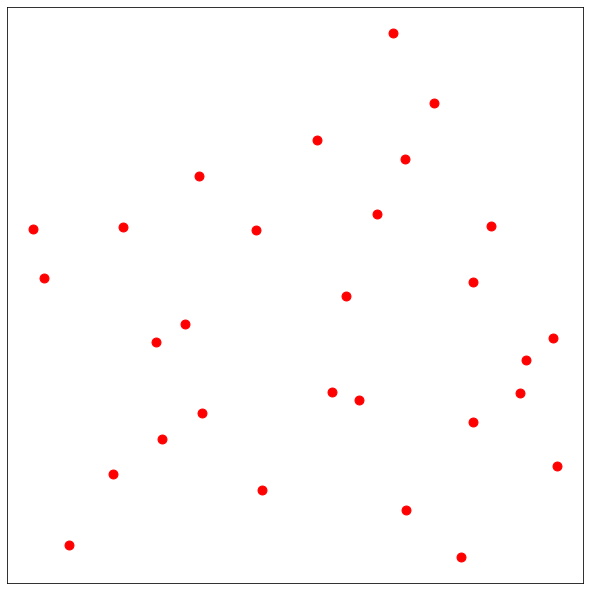

In [13]:
from io import StringIO
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Data string (cut-off data is ignored)
data_str = """
Au1 4.248121125 1.655160183 2.959082293
Au2 0.134411940 0.040429192 0.069599684
Au3 2.958433330 2.099904467 -0.262323016
Au4 2.162421959 -6.240474399 0.763068859
Au5 6.015567568 -3.147666840 2.960991448
Au6 0.691716123 -5.028950770 3.664334793
Au7 3.573756740 -4.082999919 5.427415311
S1 4.672967631 2.979829211 1.071811571
S2 1.238035230 1.254676533 -1.609047271
S3 -0.016754803 -5.854766215 1.567879875
S4 5.920038535 -3.922514716 5.192034478
S5 1.278335928 -4.410966592 5.861077045
S6 3.842066351 0.336276163 4.847347780
S7 -1.028475296 -1.181458615 1.702556392
S8 4.256728793 -6.712714766 -0.197857863
S9 6.402846543 -2.608854051 0.681607378
Au8 1.039542537 -2.286419424 2.137933733
Au9 3.388517386 -1.613304235 3.562141976
Au10 5.243831114 -4.625138509 0.259061332
Au11 3.177204579 -3.903948421 2.180548232
C1 5.234269498 -1.267910297 0.225552152
C2 5.059525709 -7.825128523 1.026367578
C3 -0.661617418 -7.542191162 1.914391467
C4 0.609696988 -2.711033182 6.045598591
C5 6.463239907 -5.671940745 5.052757858
C6 5.502812348 0.063557209 5.588215010
C7 4.071090685 4.655598421 1.533997591
C8 2.065105915 -0.051487758 -2.607114734
C9 -1.178984963 -0.008471112 3.111715524
"""

# Convert data string to DataFrame
data = StringIO(data_str)
df = pd.read_csv(data, sep=" ", names=["Atom", "x", "y", "z"])

# Initialize the graph
G = nx.Graph()

# Add nodes with position as a node attribute
for index, row in df.iterrows():
    G.add_node(row['Atom'], pos=(row['x'], row['y'], row['z']))  # including z-coordinate for distance calculation

# Calculate distances and add edges based on nearest 10 neighbors
for node1 in G.nodes(data='pos'):
    distances = {}
    for node2 in G.nodes(data='pos'):
        if node1[0] != node2[0]:  # ensure we're not comparing the same node
            distance = np.linalg.norm(np.array(node1[1])-np.array(node2[1]))
            distances[node2[0]] = distance
    # Sort nodes by distance and select nearest 10
    nearest_10 = sorted(distances, key=distances.get)[:10]
    for neighbor in nearest_10:
        G.add_edge(node1[0], neighbor)

# Extract positions from node attributes for plotting (ignoring z-coordinate for 2D plot)
# Extract positions from node attributes for plotting
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=80, edge_color='gray', node_color='red', with_labels=True)
plt.title('Topological Graph of Atomic Cluster')
plt.show()
